In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

In [2]:
train_data=pd.read_csv('F:\\data_science\\Mercedes_benz_dataset\\train.csv')
test_data=pd.read_csv('F:\\data_science\\Mercedes_benz_dataset\\test.csv')
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.shape

(4209, 378)

In [4]:
test_data.shape

(4209, 377)

In [5]:
test_data.tail()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0
4208,8416,t,aa,ai,c,d,aa,g,r,0,...,1,0,0,0,0,0,0,0,0,0


average test time: 100.66931812782121


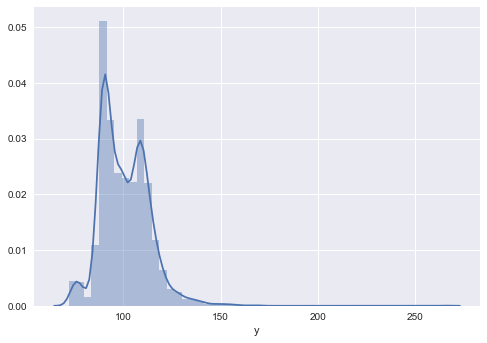

In [6]:
import seaborn as sns
sns.distplot(train_data['y']);
print ('average test time: '+str(train_data['y'].mean()))

In [7]:
train_data[train_data['y']>150]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
253,505,150.43,t,b,as,c,d,i,l,x,...,0,0,1,0,0,0,0,1,0,0
342,681,169.91,aa,l,ak,f,d,i,c,d,...,0,0,0,0,0,0,0,0,0,0
429,836,154.87,ak,l,ae,f,d,d,g,w,...,0,0,0,0,0,0,0,0,0,0
883,1770,265.32,y,r,ai,f,d,ag,l,t,...,0,0,0,0,0,0,0,0,0,0
889,1784,158.53,aj,l,as,f,d,ag,k,e,...,0,0,0,0,0,0,0,0,0,0
1060,2111,154.43,w,v,r,c,d,ag,d,q,...,1,0,0,0,0,0,0,0,0,0
1203,2396,160.87,j,o,as,f,d,ab,g,p,...,1,0,0,0,0,0,0,0,0,0
1205,2403,150.89,x,b,m,c,d,ab,j,j,...,0,0,1,0,0,0,0,0,0,0
1269,2511,152.32,s,aa,m,c,d,ab,g,g,...,1,0,0,0,0,0,0,0,0,0
1459,2903,167.45,ai,b,ae,a,d,ac,g,m,...,0,0,1,0,0,0,0,0,0,0


In [8]:
new_train_data=train_data[train_data['y']<150]
new_train_data=new_train_data.reset_index()
del new_train_data['index']

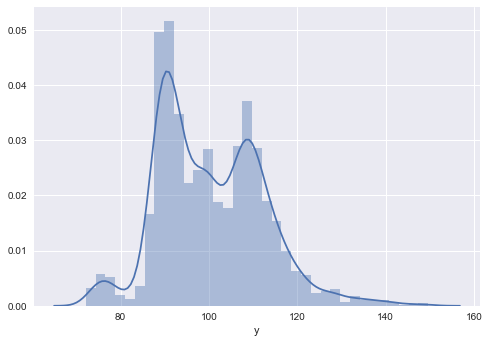

In [9]:
sns.distplot(new_train_data['y']);

In [10]:
y_log=np.log(new_train_data['y'])

average value :4.602558673915302


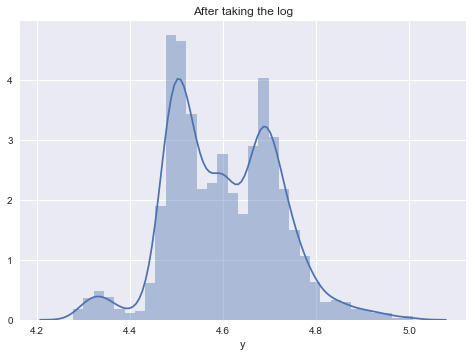

In [11]:
sns.distplot(y_log)
plt.title("After taking the log");
print ("average value :"+str(y_log.mean()))

In [12]:
new_train_data['y']=np.log(new_train_data['y'])
new_train_data['y'].mean()

4.602558673915302

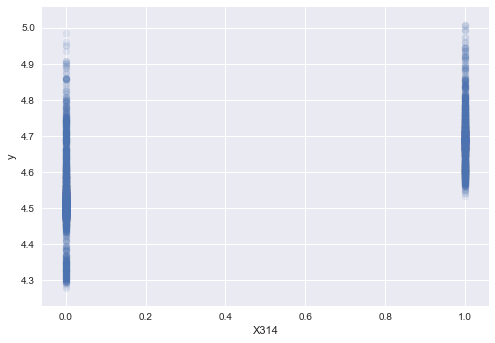

In [13]:
plt.scatter(new_train_data['X314'],new_train_data['y'],alpha=0.1);
plt.xlabel("X314")
plt.ylabel('y');

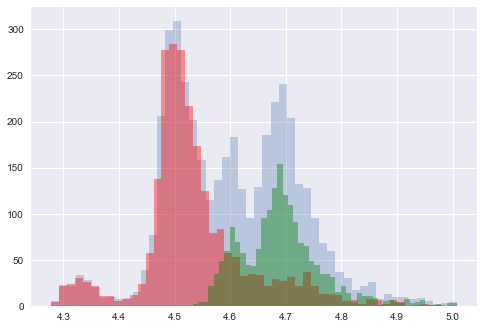

In [14]:
plt.hist(new_train_data['y'],bins=50,alpha=0.3);
plt.hist(new_train_data[new_train_data['X314']==0]['y'],bins=50,alpha=0.4,color='red')
plt.hist(new_train_data[new_train_data['X314']==1]['y'],bins=50,alpha=0.4,color='green');

In [15]:
numerical_variables=[x for x in new_train_data.columns if (x not in ['y','ID']) and (new_train_data[x].dtypes=='int64')]

In [16]:
shape=new_train_data.shape[0]
columns_with_less_fraction=[]
for i in range(len(numerical_variables)):
    if new_train_data[numerical_variables[i]].sum()/shape<=0.01 or new_train_data[numerical_variables[i]].sum()/shape>=0.99:
        columns_with_less_fraction.append(numerical_variables[i])
len(columns_with_less_fraction)

146

In [17]:
for i in columns_with_less_fraction:
    del new_train_data[i]
    del test_data[i]
new_train_data.shape

(4194, 232)

In [18]:
test_data.shape

(4209, 231)

In [19]:
numerical_variables=[x for x in new_train_data.columns if (x not in ['y','ID']) and (new_train_data[x].dtypes=='int64')]
numerical_correlations=new_train_data[numerical_variables].corr()

In [20]:
lst=[]
for i in numerical_variables:
    for j in numerical_variables:
        if numerical_correlations[i][j]>=0.9 and (int(i[1:])<int(j[1:])):
            lst.append([i,j])
len(lst)

108

In [21]:
for i in range(len(lst)):
    try:
        del new_train_data[lst[i][0]]
        del test_data[lst[i][0]]
    except:
        pass

In [22]:
print(new_train_data.shape)
print(test_data.shape)

(4194, 180)
(4209, 179)


In [23]:
categorical_variables=[x for x in new_train_data.columns if new_train_data[x].dtypes=='object']
categorical_variables

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [24]:
new_train_data[categorical_variables].tail()

,X0,X1,X2,X3,X4,X5,X6,X8
4189,ak,s,as,c,d,aa,d,q
4190,j,o,t,d,d,aa,h,h
4191,ak,v,r,a,d,aa,g,e
4192,al,r,e,f,d,aa,l,u
4193,z,r,ae,c,d,aa,g,w


In [25]:
test_data[categorical_variables].tail()

,X0,X1,X2,X3,X4,X5,X6,X8
4204,aj,h,as,f,d,aa,j,e
4205,t,aa,ai,d,d,aa,j,y
4206,y,v,as,f,d,aa,d,w
4207,ak,v,as,a,d,aa,c,q
4208,t,aa,ai,c,d,aa,g,r


In [26]:
new_train_data[categorical_variables].apply(lambda x: len(x.unique()))

X0    47
X1    27
X2    44
X3     7
X4     4
X5    29
X6    12
X8    25
dtype: int64

In [27]:
test_data[categorical_variables].apply(lambda x: len(x.unique()))

X0    49
X1    27
X2    45
X3     7
X4     4
X5    32
X6    12
X8    25
dtype: int64

In [28]:
d=[]
d1=[]
for i in categorical_variables:
    d1.append(i)
    for j in new_train_data[i].unique():
        s=len(new_train_data[new_train_data[i]==j][i])/4194
        if s<0.4*(1/len(new_train_data[i].unique())):
            d1.append(j)
    d.append(d1)
    d1=[]

In [29]:
new_categorical_data=pd.DataFrame(columns=categorical_variables)
new_categorical_data2=pd.DataFrame(columns=categorical_variables)
lst=[]
for i in range(len(categorical_variables)):
    for j in range(4194):
        if new_train_data[categorical_variables[i]][j] in d[i][1:]:
            lst.append('other')
        else:
            lst.append(new_train_data[categorical_variables[i]][j])
    new_categorical_data[categorical_variables[i]]=lst
    lst=[]
new_categorical_data.tail()

,X0,X1,X2,X3,X4,X5,X6,X8
4189,ak,s,as,c,d,aa,d,q
4190,j,o,other,d,d,aa,h,h
4191,ak,v,r,a,d,aa,g,e
4192,al,r,e,f,d,aa,l,u
4193,z,r,ae,c,d,aa,g,w


In [30]:
lst=[]
for i in range(len(categorical_variables)):
    for j in range(4209):
        if test_data[categorical_variables[i]][j] in d[i][1:]:
            lst.append('other')
        else:
            lst.append(test_data[categorical_variables[i]][j])
    new_categorical_data2[categorical_variables[i]]=lst
    lst=[]
new_categorical_data2.tail()

,X0,X1,X2,X3,X4,X5,X6,X8
4204,aj,other,as,f,d,aa,j,e
4205,t,aa,ai,d,d,aa,j,y
4206,y,v,as,f,d,aa,d,w
4207,ak,v,as,a,d,aa,other,q
4208,t,aa,ai,c,d,aa,g,r


In [31]:
new_categorical_data[categorical_variables].apply(lambda x: len(x.unique()))

X0    20
X1    11
X2    14
X3     6
X4     2
X5    23
X6     8
X8    25
dtype: int64

In [32]:
new_categorical_data2[categorical_variables].apply(lambda x: len(x.unique()))

X0    26
X1    11
X2    20
X3     6
X4     2
X5    27
X6     8
X8    25
dtype: int64

In [33]:
for i in categorical_variables:
    del new_train_data[i]
    del test_data[i]
    new_train_data[i]=new_categorical_data[i]
    test_data[i]=new_categorical_data2[i]

In [34]:
test_data.tail()

,ID,X10,X12,X13,X20,X22,X23,X27,X28,X32,...,X377,X378,X0,X1,X2,X3,X4,X5,X6,X8
4204,8410,0,0,0,0,0,0,1,0,0,...,0,0,aj,other,as,f,d,aa,j,e
4205,8411,0,0,0,0,0,0,1,0,0,...,0,0,t,aa,ai,d,d,aa,j,y
4206,8413,0,0,0,0,0,0,1,0,0,...,0,0,y,v,as,f,d,aa,d,w
4207,8414,0,0,1,0,0,0,1,0,0,...,1,0,ak,v,as,a,d,aa,other,q
4208,8416,0,0,0,0,0,0,1,0,0,...,0,0,t,aa,ai,c,d,aa,g,r


In [35]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [36]:
encoded_train_data=pd.DataFrame(data=new_train_data,copy=True)
encoded_test_data=pd.DataFrame(data=test_data,copy=True)

In [37]:
encoded_test_data[categorical_variables] =encoded_test_data[categorical_variables].apply(lambda x: d[x.name].fit_transform(x))
encoded_train_data[categorical_variables]=encoded_train_data[categorical_variables].apply(lambda x: d[x.name].transform(x))

In [38]:
encoded_train_data.tail()

,ID,y,X10,X12,X13,X20,X22,X23,X27,X28,...,X377,X378,X0,X1,X2,X3,X4,X5,X6,X8
4189,8405,4.676467,0,0,0,0,0,0,1,0,...,0,0,3,9,8,1,0,1,1,16
4190,8406,4.689236,0,0,0,0,0,0,0,0,...,0,0,14,6,15,2,0,1,3,7
4191,8412,4.693364,0,1,1,0,0,0,1,0,...,1,0,3,10,16,0,0,1,2,4
4192,8415,4.471410,0,0,0,0,0,0,0,0,...,0,0,4,8,11,3,0,1,6,20
4193,8417,4.708178,0,0,0,1,0,0,0,0,...,0,0,25,8,3,1,0,1,2,22


In [39]:
encoded_test_data.tail()

,ID,X10,X12,X13,X20,X22,X23,X27,X28,X32,...,X377,X378,X0,X1,X2,X3,X4,X5,X6,X8
4204,8410,0,0,0,0,0,0,1,0,0,...,0,0,2,7,8,3,0,1,5,4
4205,8411,0,0,0,0,0,0,1,0,0,...,0,0,20,1,4,2,0,1,5,24
4206,8413,0,0,0,0,0,0,1,0,0,...,0,0,24,10,8,3,0,1,1,22
4207,8414,0,0,1,0,0,0,1,0,0,...,1,0,3,10,8,0,0,1,7,16
4208,8416,0,0,0,0,0,0,1,0,0,...,0,0,20,1,4,1,0,1,2,17


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
independent_variables=[x for x in new_train_data.columns if x not in ['y','ID']]

In [42]:
X_train,X_test,y_train,y_test=train_test_split(encoded_train_data[independent_variables], encoded_train_data['y'], test_size=0.2, random_state = 0)

In [43]:
from sklearn.model_selection import cross_val_score

### Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [45]:
def scorer(estimator,X,y):
    y1=np.array(estimator.predict(X))
    mse= np.mean((y-y1)**2)
    return mse

In [46]:
a=cross_val_score(lm,X_train,y_train,scoring=scorer,cv=5)
print('5-fold cross validation score: '+ str(a.mean()))

5-fold cross validation score: 0.00515214529868


In [47]:
lm.fit(X_train,y_train)
print('mean squared error: '+ str(scorer(lm,X_test,y_test)))
print('the r-squared score: '+str(lm.score(X_test,y_test)))

mean squared error: 0.005129540801472192
the r-squared score: 0.629342506457


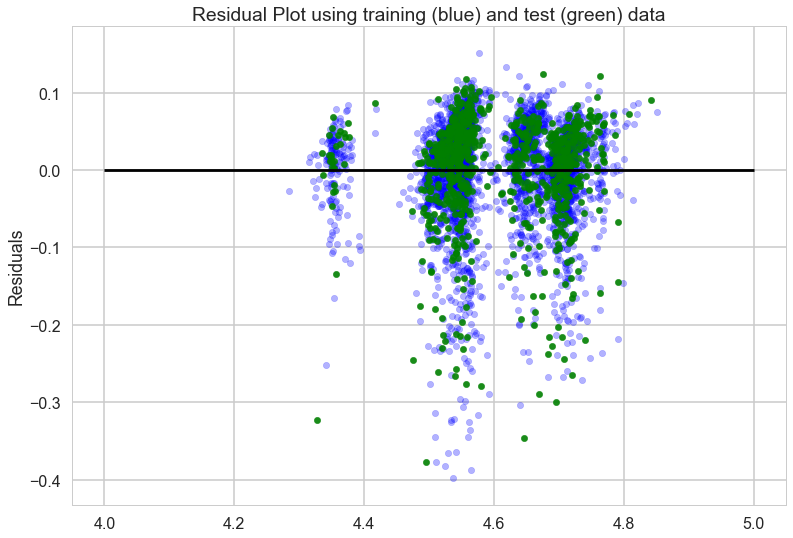

In [48]:
sns.set_style("whitegrid")
sns.set_context("poster")
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='b', s=40, alpha=0.3)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='g', s=40,alpha=0.9)
plt.hlines(y = 0, xmin=4, xmax = 5)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

### Ridge regression

In [49]:
from sklearn.linear_model import Ridge

In [50]:
alphas=[0.001,0.01,0.1,1,10,1000]
scores=[]
for alpha in alphas:
    rm=Ridge(alpha=alpha,normalize=True)
    scores.append(float('%0.5f'%(cross_val_score(rm,X_train,y_train,scoring=scorer,cv=5).mean())))
    
print("Scores obtained: ")
print(scores)
min_score=min(scores)
print('\n')
print('Minimum score is '+str(min_score)+' at alpha='+str(alphas[scores.index(min_score)]))

Scores obtained: 
[0.00512, 0.00506, 0.00505, 0.00566, 0.00906, 0.01382]


Minimum score is 0.00505 at alpha=0.1


In [51]:
rm=Ridge(alpha=0.1,normalize=True)
rm.fit(X_train,y_train)
print('alpha=0.1 :')
print('test score: '+ str(scorer(rm,X_test,y_test)))
print('the r-squared score: '+str(rm.score(X_test,y_test)))

alpha=0.1 :
test score: 0.0050391184206264785
the r-squared score: 0.635876372614


### Lasso regression

In [52]:
from sklearn.linear_model import Lasso

In [53]:
alphas=[0.001,0.01,0.1,1,10,1000]
scores=[]
for alpha in alphas:
    lam=Lasso(alpha=alpha,normalize=True)
    scores.append(float('%0.4f'%(cross_val_score(lam,X_train,y_train,scoring=scorer,cv=5).mean())))
    
print("Scores obtained: ")
print(scores)
min_score=min(scores)
print('\n')
print('Minimum score is '+str(min_score)+' at alpha='+str(alphas[scores.index(min_score)]))

Scores obtained: 
[0.0107, 0.0139, 0.0139, 0.0139, 0.0139, 0.0139]


Minimum score is 0.0107 at alpha=0.001


### Decision Tree regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
depths=[6,7,9,10,11]
scores=[]
for depth in depths:
    dm=DecisionTreeRegressor(max_depth=depth,max_features='sqrt',random_state=1)
    scores.append(float('%0.4f'%(cross_val_score(dm,X_train,y_train,scoring=scorer,cv=5).mean())))
    
print("Scores obtained: ")
print(scores)
min_score=min(scores)
print('\n')
print('Minimum score is '+str(min_score)+' at max_depth='+str(depths[scores.index(min_score)]))

Scores obtained: 
[0.0061, 0.0058, 0.0059, 0.0058, 0.0061]


Minimum score is 0.0058 at max_depth=7


In [56]:
dm=DecisionTreeRegressor(max_depth=9,max_features='sqrt',random_state=1)
dm.fit(X_train,y_train)
print('max_depth=9 :')
print('mean squared error: '+ str(scorer(dm,X_test,y_test)))
print('the r-squared score: '+str(dm.score(X_test,y_test)))

max_depth=9 :
mean squared error: 0.006392055847086004
the r-squared score: 0.538113938349


### Adaptive boosting

In [57]:
from sklearn.ensemble import AdaBoostRegressor

In [58]:
temp_score=100
alphas=[0.001,0.01]
learning_rates=[0.01,0.001]
n_estimators=[20,30,40]

In [59]:
for alpha in alphas:
    for lr in learning_rates:
        for n in n_estimators:
            adam=AdaBoostRegressor(Lasso(alpha=alpha,normalize=True),n_estimators=n,learning_rate=lr,random_state=1)
            score=(float('%0.5f'%(cross_val_score(adam,X_train,y_train,scoring=scorer,cv=5).mean())))
            if score<temp_score:
                temp_score=score
                alpha_1=alpha
                lr_1=lr
                n_1=n

print('Minimum score(MSE) obtained is: '+str(temp_score))
print('It is obtained at alpha='+str(alpha_1)+', learning rate='+str(lr_1)+' and n_estimators='+str(n_1))

Minimum score(MSE) obtained is: 0.01051
It is obtained at alpha=0.001, learning rate=0.01 and n_estimators=40


In [60]:
for alpha in alphas:
    for lr in learning_rates:
        for n in n_estimators:
            adam=AdaBoostRegressor(Ridge(alpha=alpha,normalize=True),n_estimators=n,learning_rate=lr,random_state=1)
            score=(float('%0.5f'%(cross_val_score(adam,X_train,y_train,scoring=scorer,cv=5).mean())))
            if score<temp_score:
                temp_score=score
                alpha_1=alpha
                lr_1=lr
                n_1=n

print('Minimum score(MSE) obtained is: '+str(temp_score))
print('It is obtained at alpha='+str(alpha_1)+', learning rate='+str(lr_1)+' and n_estimators='+str(n_1))

Minimum score(MSE) obtained is: 0.00506
It is obtained at alpha=0.01, learning rate=0.001 and n_estimators=40


In [61]:
for lr in learning_rates:
    for n in n_estimators:
        adam=AdaBoostRegressor(n_estimators=n,learning_rate=lr,random_state=1)
        score=(float('%0.5f'%(cross_val_score(adam,X_train,y_train,scoring=scorer,cv=5).mean())))
        if score<temp_score:
            temp_score=score
            alpha_1=alpha
            lr_1=lr
            n_1=n

print('Minimum score(MSE) obtained is: '+str(temp_score))
print('It is obtained at learning rate='+str(lr_1)+' and n_estimators='+str(n_1))

Minimum score(MSE) obtained is: 0.00484
It is obtained at learning rate=0.01 and n_estimators=20


In [62]:
adam=AdaBoostRegressor(n_estimators=20,learning_rate=0.01,random_state=1)

In [63]:
adam.fit(X_train,y_train)
print('test score: '+ str(scorer(adam,X_test,y_test)))
print('the r-squared score: '+str(adam.score(X_test,y_test)))

test score: 0.0047205902485899925
the r-squared score: 0.658893024287


### Gradient boosting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
temp_score=100
learning_rates=[0.1,0.01,0.001]
losses=['ls','lad']

In [66]:
for lr in learning_rates:
    for loss in losses:
        gram=GradientBoostingRegressor(n_estimators=120,learning_rate=lr,random_state=1,loss=loss)
        score=(float('%0.5f'%(cross_val_score(gram,X_train,y_train,scoring=scorer,cv=5).mean())))
        if score<temp_score:
            gram_1=gram
            temp_score=score
            lr_1=lr
            loss_1=loss
            
print('Minimum score(MSE) obtained is: '+str(temp_score))
print('It is obtained at learning rate='+str(lr_1)+' and loss type:'+str(loss))

Minimum score(MSE) obtained is: 0.00481
It is obtained at learning rate=0.1 and loss type:lad


In [67]:
gram=GradientBoostingRegressor(n_estimators=120,learning_rate=0.1,random_state=1,loss='lad')

In [68]:
a=cross_val_score(gram,X_train,y_train,scoring=scorer,cv=5)
print('5-fold cross validation score: '+ str(a.mean()))

5-fold cross validation score: 0.00502043058726


In [69]:
gram.fit(X_train,y_train)
print('mean squareed error: '+ str(scorer(gram,X_test,y_test)))
print('the r-squared score: '+str(gram.score(X_test,y_test)))

mean squareed error: 0.005056224853508758
the r-squared score: 0.634640272195


## Predictions on test data

In [70]:
test_predictions=adam.predict(encoded_test_data[independent_variables])

In [71]:
test_predictions=np.exp(test_predictions)

In [72]:
Id=np.array(encoded_test_data['ID'])

In [73]:
submission=pd.DataFrame({
    'ID':Id,
    'y': test_predictions
})
submission.to_csv('mercedes_submission.csv', index=False)